# In this task, you have to plot the decision boundary by building a predictor on the Iris Dataset.

Note: Consider only the Petal Length and Sepal Lenght column to do the predictions, ignore the other 2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [5]:
data.replace(to_replace =["Iris-setosa","Iris-virginica","Iris-versicolor"], 
                 value =[0,1,2],inplace=True) 

In [6]:
data["Species"].value_counts()

2    50
1    50
0    50
Name: Species, dtype: int64

# Splitting the data into train and test set and using Decision Tree Algorithm for predictions

In [7]:
X=data.iloc[:,1:4:2].values

In [8]:
X.shape

(150, 2)

In [9]:
y=data.iloc[:,-1].values

In [10]:
y.shape

(150,)

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [13]:
X_train.shape

(120, 2)

In [14]:
y_train.shape

(120,)

In [15]:
X_test.shape

(30, 2)

In [16]:
y_test.shape

(30,)

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf=DecisionTreeClassifier()

In [19]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
y_pred=clf.predict(X_test)

In [21]:
from sklearn.metrics import accuracy_score

In [22]:
accuracy_score(y_test,y_pred)

0.9333333333333333

# Creating Meshgrid

In [23]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01)

In [24]:
XX,YY=np.meshgrid(a,b)

In [25]:
XX.shape

(770, 530)

In [26]:
YY.shape

(770, 530)

# Predicting every point of the Meshgrid using Decision Tree Classifier

In [27]:
new=np.array([XX.ravel(),YY.ravel()]).T

In [28]:
new.shape

(408100, 2)

In [29]:
y_predbound=clf.predict(new)

In [30]:
y_predbound

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

# Plotting all training data on the plot

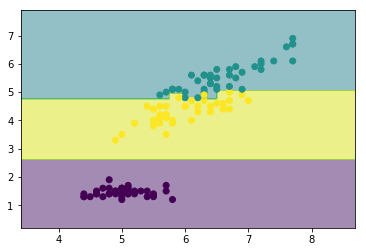

In [31]:
plt.contourf(XX,YY,y_predbound.reshape(XX.shape),alpha=0.50)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)